In [499]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='whitegrid')

In [500]:
characters_df = pd.read_csv('src/data/csv/characters_test.csv')
characters_df.head(5)
characters_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        98 non-null     object 
 1   name                      96 non-null     object 
 2   alias(es)                 55 non-null     object 
 3   gender                    98 non-null     object 
 4   house(s)                  67 non-null     object 
 5   allegiance(s)             84 non-null     object 
 6   title(s)                  82 non-null     object 
 7   father                    56 non-null     object 
 8   mother                    43 non-null     object 
 9   sibling(s)                50 non-null     object 
 10  child(ren)                33 non-null     object 
 11  spouse(s)                 36 non-null     object 
 12  lover(s)                  16 non-null     object 
 13  race                      52 non-null     object 
 14  culture(s)  

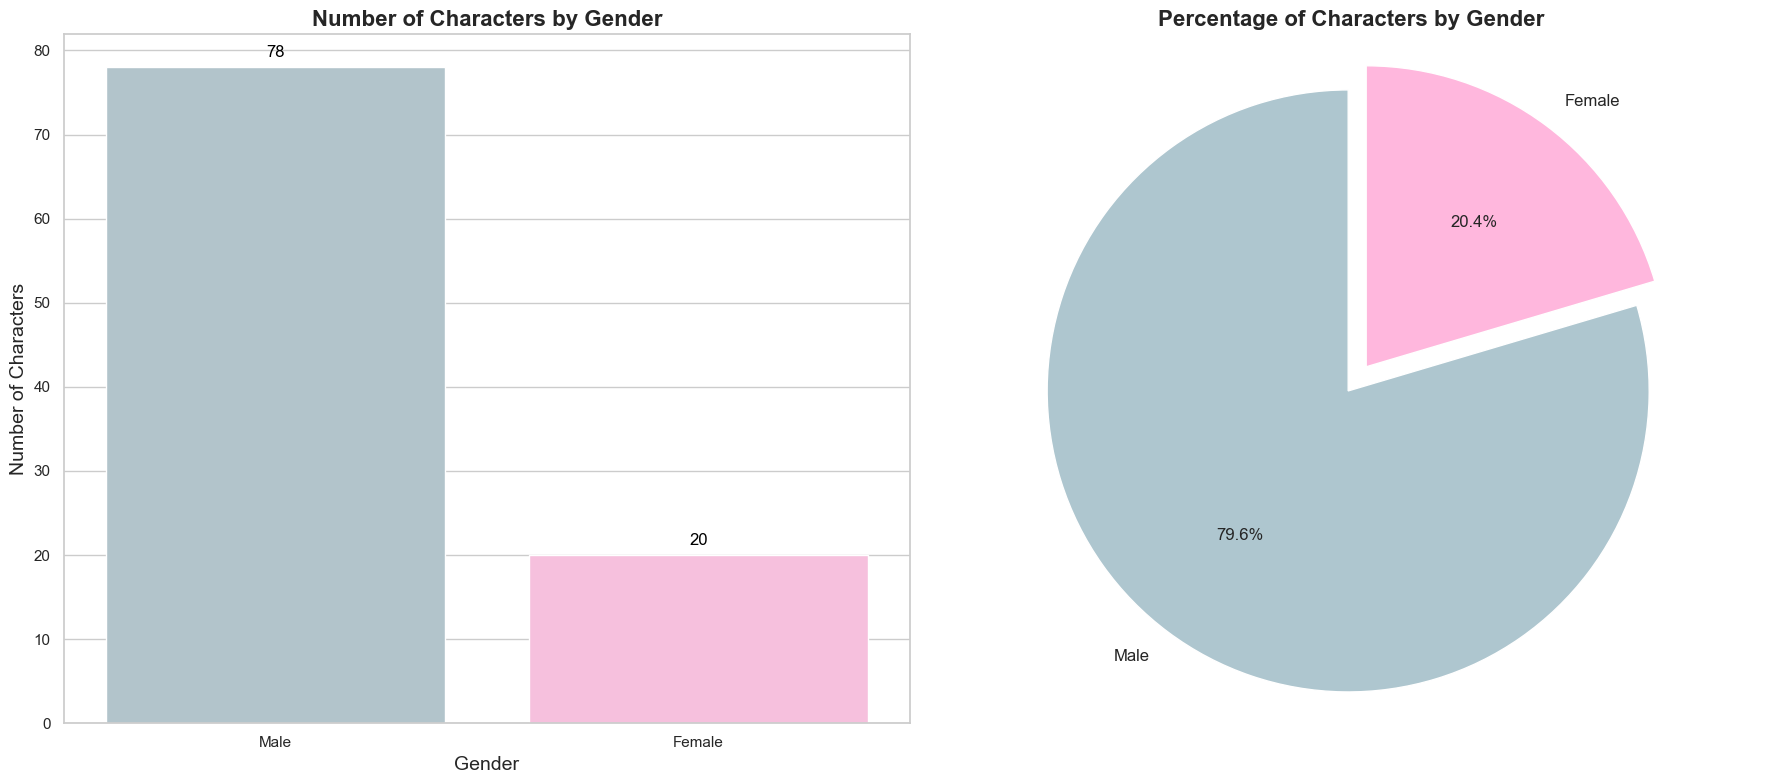

In [501]:
# Handle Missing 'gender' Values
characters_df['gender'] = characters_df['gender'].fillna('Unknown')

# If there are unexpected gender categories, map them to 'Unknown' or other valid categories
valid_genders = ['Male', 'Female', 'Unknown']
characters_df['gender'] = characters_df['gender'].apply(lambda x: x if x in valid_genders else 'Unknown')

# Count the number of characters by gender
gender_count = characters_df['gender'].value_counts()

# Calculate the percentage of characters by gender
gender_percentage = gender_count / gender_count.sum() * 100

# Define pastel colors for genders
gender_colors = {
    'Male': '#AEC6CF',     # Pastel Blue
    'Female': '#FFB7DD',   # Pastel Pink
    'Unknown': '#CFCFC4'   # Pastel Gray
}

# Ensure the order of genders is consistent
genres = ['Male', 'Female']
if gender_count.get('Unknown', 0) > 0:
    genres.append('Unknown')

# Reindex the series to ensure all genres are present
gender_count = gender_count.reindex(genres, fill_value=0)
gender_percentage = gender_percentage.reindex(genres, fill_value=0)

# Get colors based on the selected genres
colors = [gender_colors.get(g, '#CFCFC4') for g in genres]  # Default color if genre not found

# Create two plots in a single figure (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

# Bar plot for the count of characters by gender
sns.barplot(x=gender_count.index, y=gender_count.values, ax=ax[0], palette=colors, hue=gender_count.index)
ax[0].set_title('Number of Characters by Gender', fontsize=16, weight='bold')
ax[0].set_xlabel('Gender', fontsize=14)
ax[0].set_ylabel('Number of Characters', fontsize=14)

# Add value labels on top of each bar
for p in ax[0].patches:
    height = p.get_height()
    ax[0].annotate(f'{int(height)}', 
                   (p.get_x() + p.get_width() / 2., height),
                   ha='center', va='bottom', fontsize=12, color='black', 
                   xytext=(0, 5), textcoords='offset points')

# Pie chart for the percentage of characters by gender
ax[1].pie(
    gender_percentage,
    labels=gender_percentage.index,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 12},
    wedgeprops={'edgecolor': 'white'},
    explode=[0.05] * len(genres)  # Separate slices
)
ax[1].set_title('Percentage of Characters by Gender', fontsize=16, weight='bold')

# Ensure the pie chart is circular
ax[1].axis('equal')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

In [502]:
def plot_attribute_distribution_by_gender(characters_df, attribute_column, attribute_singular, attribute_plural):
    # Define a function to check if the attribute is present
    def has_attribute(attribute):
        if isinstance(attribute, list):
            return len(attribute) > 0
        elif isinstance(attribute, str):
            return attribute.strip() != ''
        else:
            return False

    # Create a new column indicating if the character has the attribute
    new_column_name = f'has_{attribute_singular}'
    characters_df[new_column_name] = characters_df[attribute_column].apply(has_attribute)

    # Count the number of Male and Female characters with and without the attribute
    counts = characters_df.groupby(['gender', new_column_name]).size().unstack(fill_value=0)

    # Rename columns for better readability
    counts.columns = [f'No {attribute_plural}', f'Has {attribute_plural}']

    # Define pastel colors for the attribute status
    color_dict = {
        f'Has {attribute_plural}': '#C1E1C1',   # Pastel Green
        f'No {attribute_plural}': '#FAA0A0',    # Pastel Red
        'Unknown': '#CFCFC4'                    # Pastel Gray
    }

    # Create two plots in a single figure (1 row, 2 columns)
    fig, ax = plt.subplots(1, 2, figsize=(18, 8))

    # Plot for Female characters
    if 'Female' in counts.index:
        female_counts = counts.loc['Female']

        # Filter out zero counts
        female_counts = female_counts[female_counts > 0]

        # Proceed only if there's data after filtering
        if not female_counts.empty:
            labels = female_counts.index
            sizes = female_counts.values
            colors = [color_dict[label] for label in labels]
            explode = [0.05] * len(sizes)  # Slightly explode all slices

            ax[0].pie(
                sizes,
                labels=labels,
                colors=colors,
                autopct='%1.1f%%',
                startangle=90,
                textprops={'fontsize': 12},
                wedgeprops={'edgecolor': 'white'},
                explode=explode
            )
            ax[0].set_title(f'Distribution of {attribute_plural} among Female Characters', fontsize=16, weight='bold')
            ax[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
        else:
            ax[0].text(0.5, 0.5, 'No Data to Display', horizontalalignment='center', verticalalignment='center')
            ax[0].set_title(f'Distribution of {attribute_plural} among Female Characters', fontsize=16, weight='bold')
            ax[0].axis('off')
    else:
        ax[0].text(0.5, 0.5, 'No Female Data', horizontalalignment='center', verticalalignment='center')
        ax[0].set_title(f'Distribution of {attribute_plural} among Female Characters', fontsize=16, weight='bold')
        ax[0].axis('off')

    # Plot for Male characters
    if 'Male' in counts.index:
        male_counts = counts.loc['Male']

        # Filter out zero counts
        male_counts = male_counts[male_counts > 0]

        # Proceed only if there's data after filtering
        if not male_counts.empty:
            labels = male_counts.index
            sizes = male_counts.values
            colors = [color_dict[label] for label in labels]
            explode = [0.05] * len(sizes)  # Slightly explode all slices

            ax[1].pie(
                sizes,
                labels=labels,
                colors=colors,
                autopct='%1.1f%%',
                startangle=90,
                textprops={'fontsize': 12},
                wedgeprops={'edgecolor': 'white'},
                explode=explode
            )
            ax[1].set_title(f'Distribution of {attribute_plural} among Male Characters', fontsize=16, weight='bold')
            ax[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
        else:
            ax[1].text(0.5, 0.5, 'No Data to Display', horizontalalignment='center', verticalalignment='center')
            ax[1].set_title(f'Distribution of {attribute_plural} among Male Characters', fontsize=16, weight='bold')
            ax[1].axis('off')
    else:
        ax[1].text(0.5, 0.5, 'No Male Data', horizontalalignment='center', verticalalignment='center')
        ax[1].set_title(f'Distribution of {attribute_plural} among Male Characters', fontsize=16, weight='bold')
        ax[1].axis('off')

    # Add a legend to the figure
    # Only include labels that are present in the data
    legend_labels = [label for label in [f'No {attribute_plural}', f'Has {attribute_plural}'] if label in counts.columns]
    fig.legend(legend_labels, loc='upper center', ncol=2)

    # Adjust layout to prevent overlap
    plt.tight_layout(rect=[0, 0, 1, 0.95])

    # Display the plots
    plt.show()

    # Save the figure as an image file
    fig.savefig(f'src/data/images/{attribute_plural}_gender_distribution.png', dpi=300)

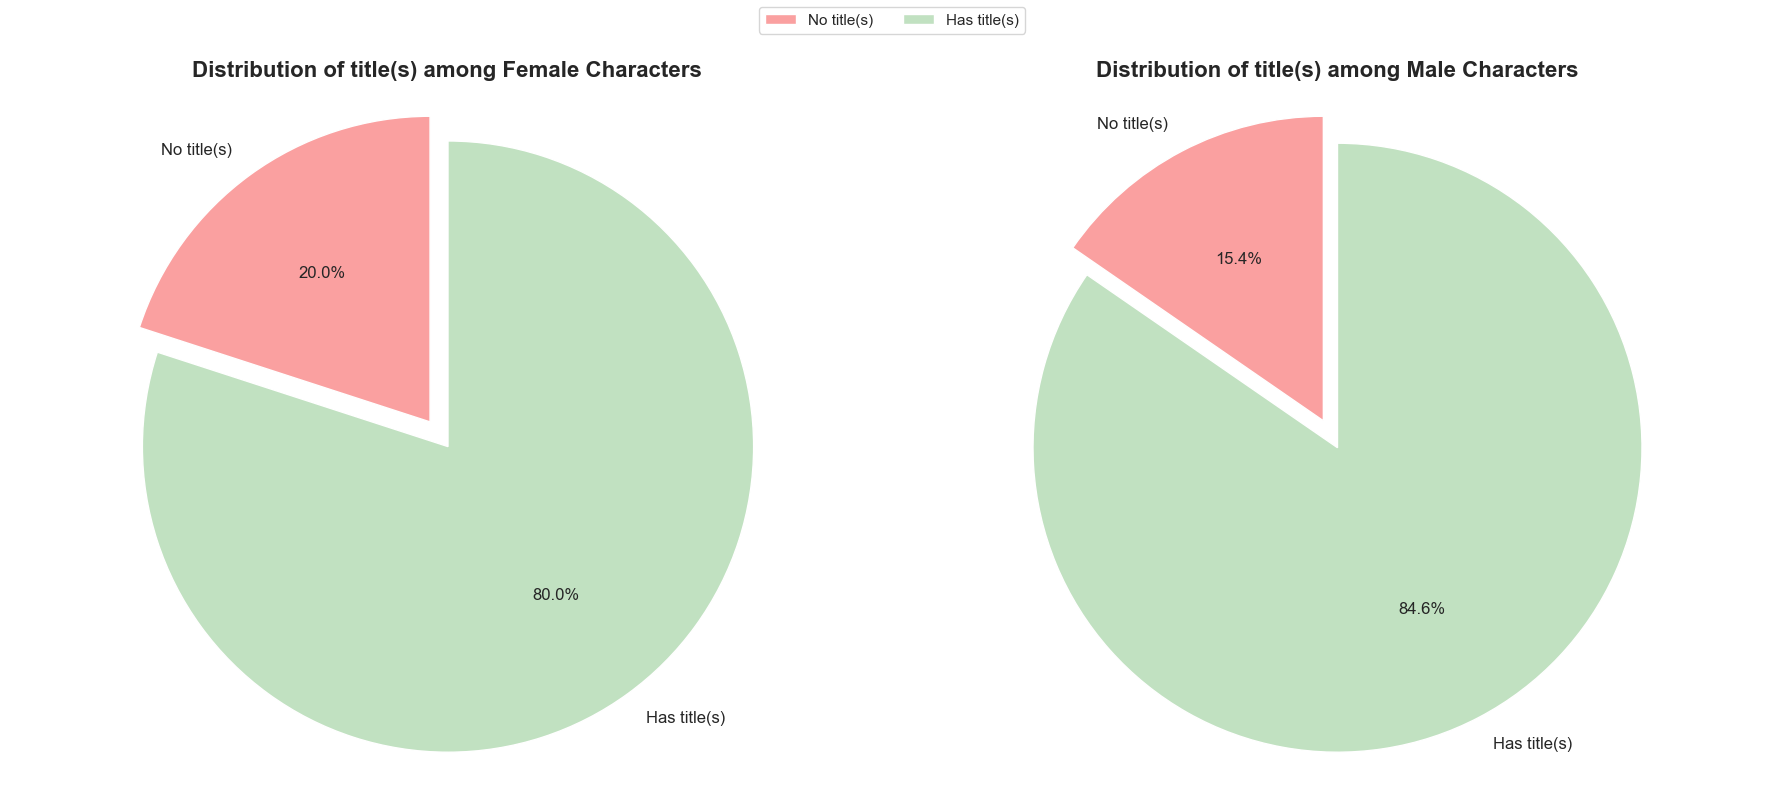

In [503]:
# For analyzing titles
plot_attribute_distribution_by_gender(characters_df, 'title(s)', 'title', 'title(s)')

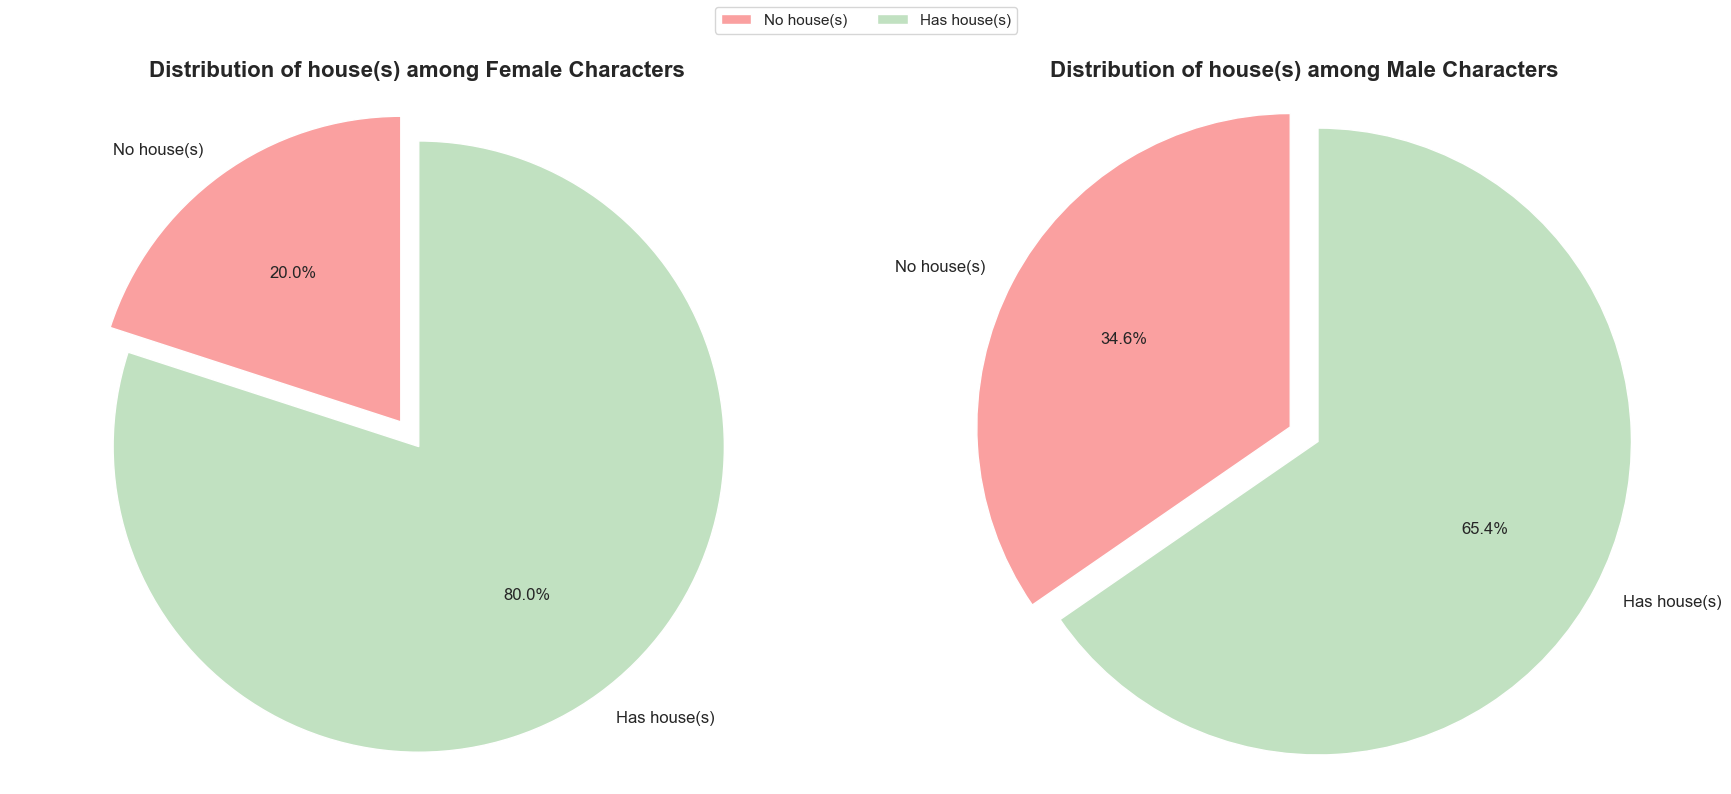

In [504]:
# For analyzing houses
plot_attribute_distribution_by_gender(characters_df, 'house(s)', 'house', 'house(s)')

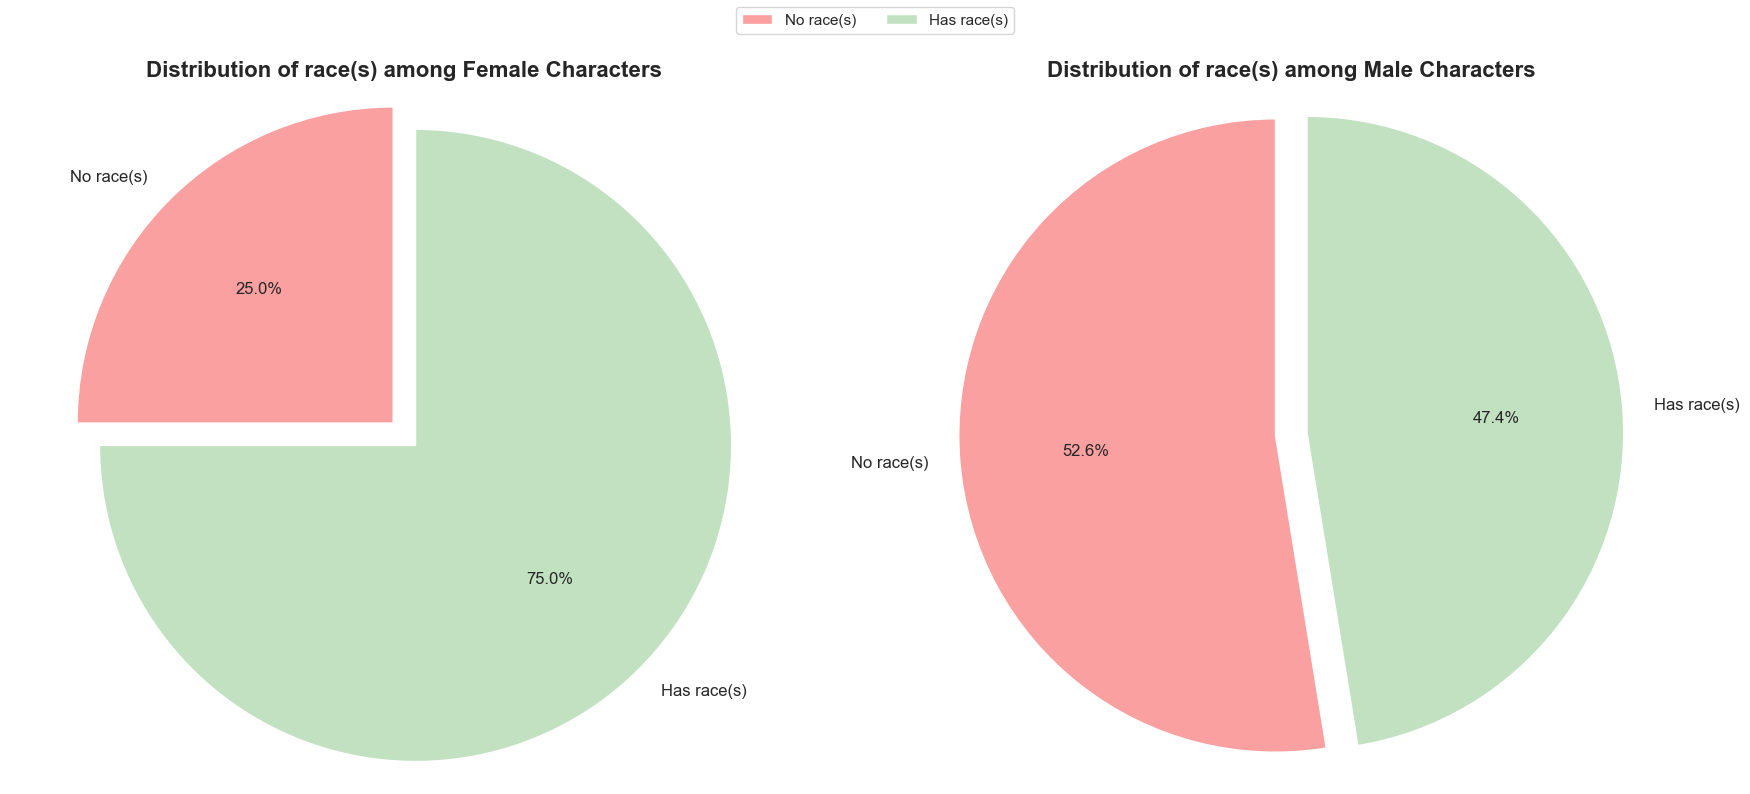

In [505]:
# For analyzing races
plot_attribute_distribution_by_gender(characters_df, 'race', 'race', 'race(s)')

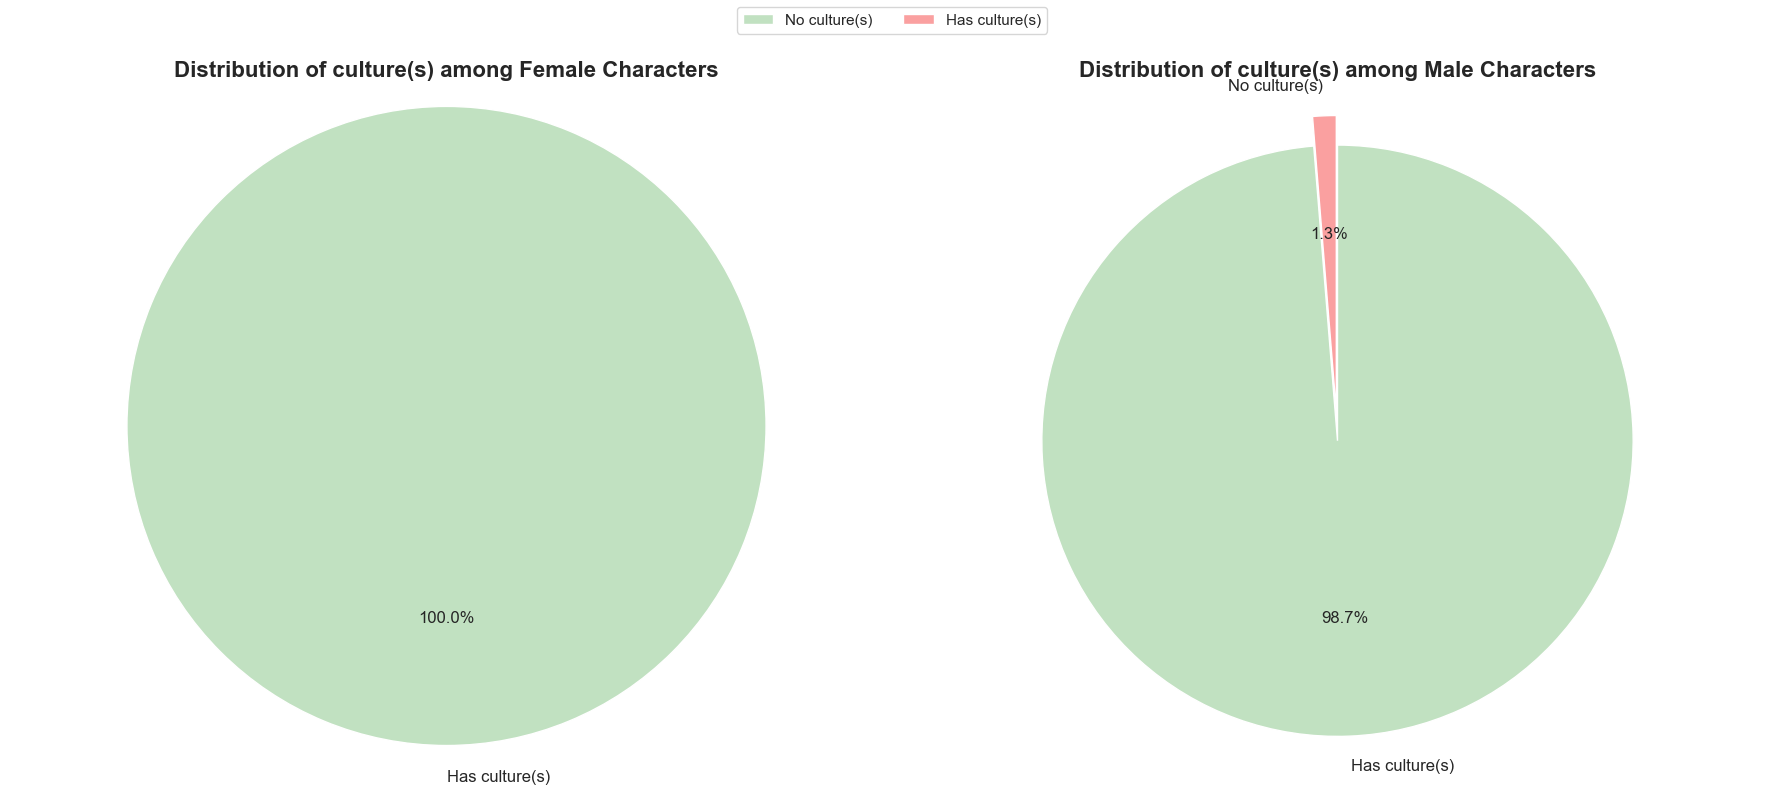

In [506]:
# For analyzing cultures
plot_attribute_distribution_by_gender(characters_df, 'culture(s)', 'culture', 'culture(s)')

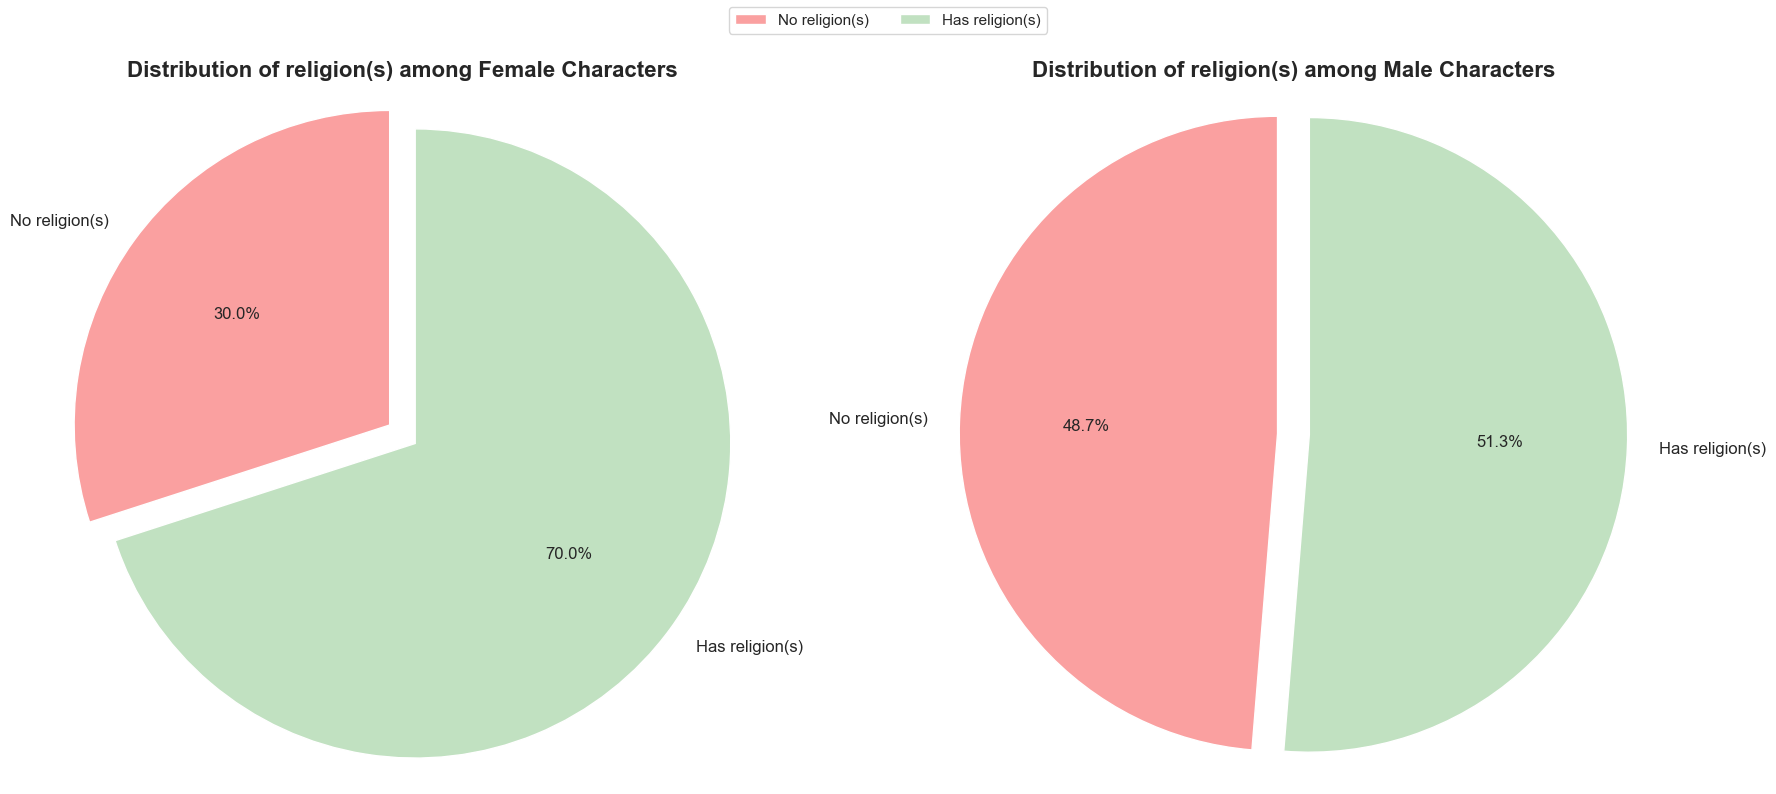

In [507]:
# For analyzing religions
plot_attribute_distribution_by_gender(characters_df, 'religion', 'religion', 'religion(s)')

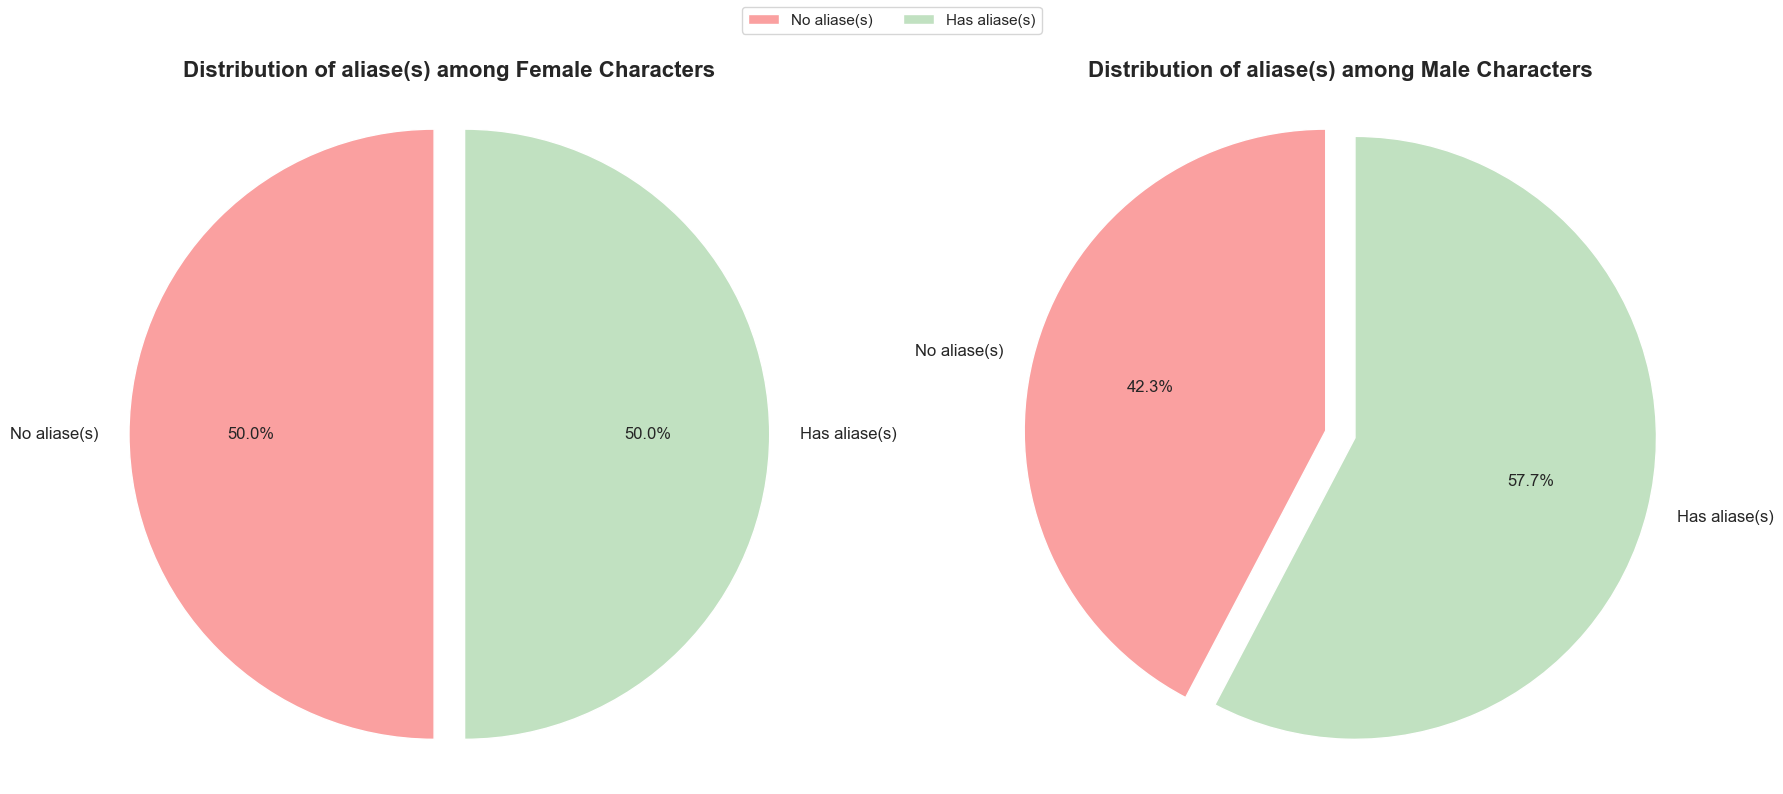

In [508]:
# For analyzing aliases
plot_attribute_distribution_by_gender(characters_df, 'alias(es)', 'alias', 'aliase(s)')

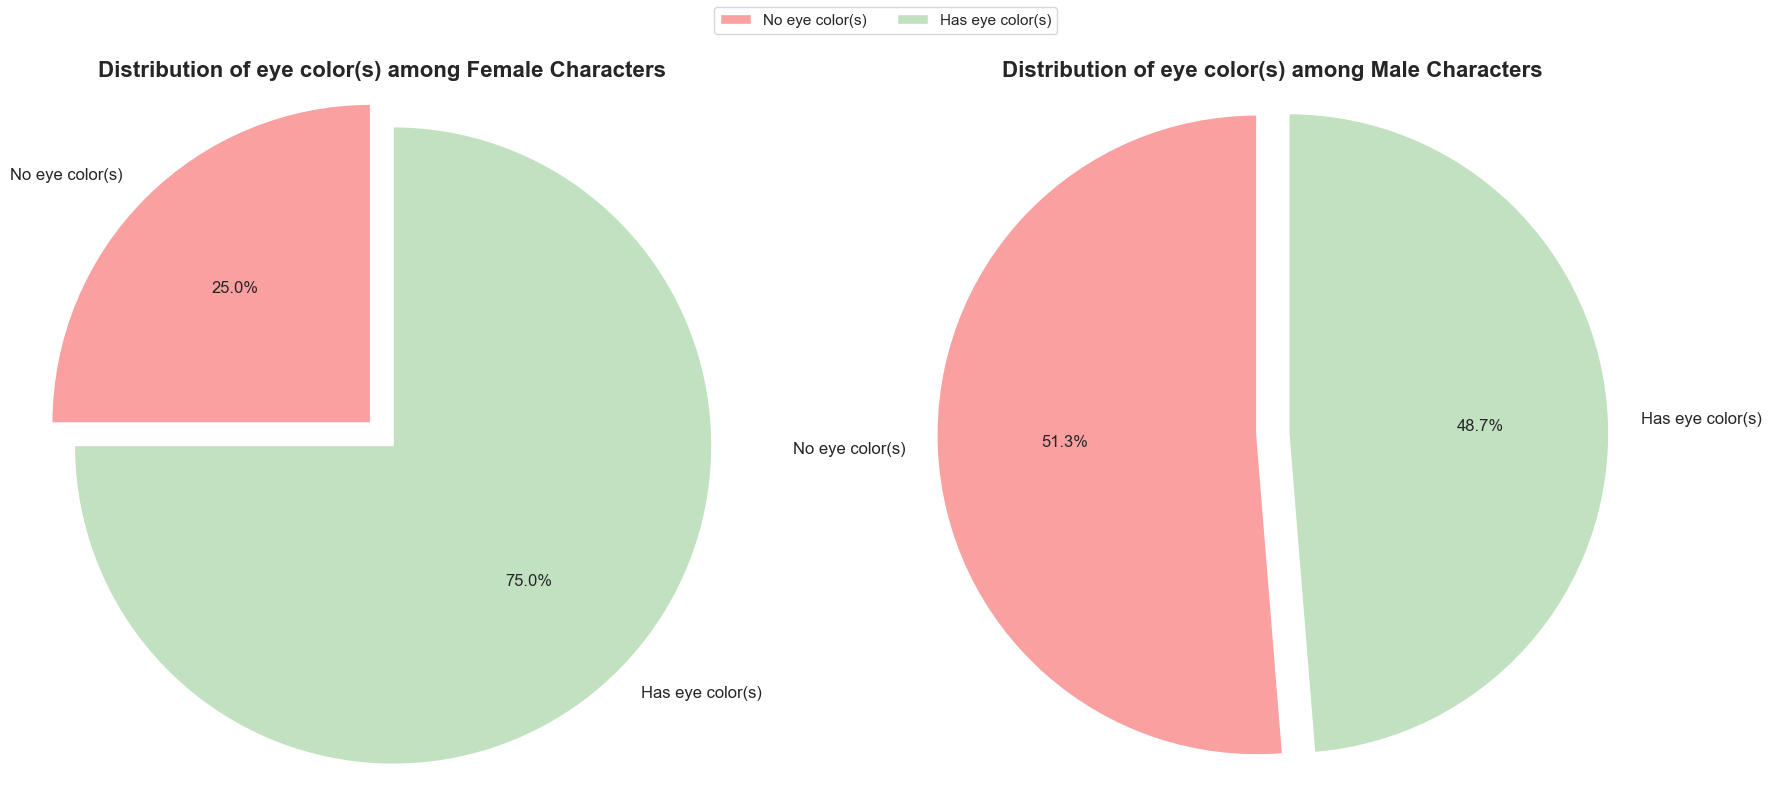

In [509]:
# For analyzing eye colors
plot_attribute_distribution_by_gender(characters_df, 'eye color', 'eye color', 'eye color(s)')

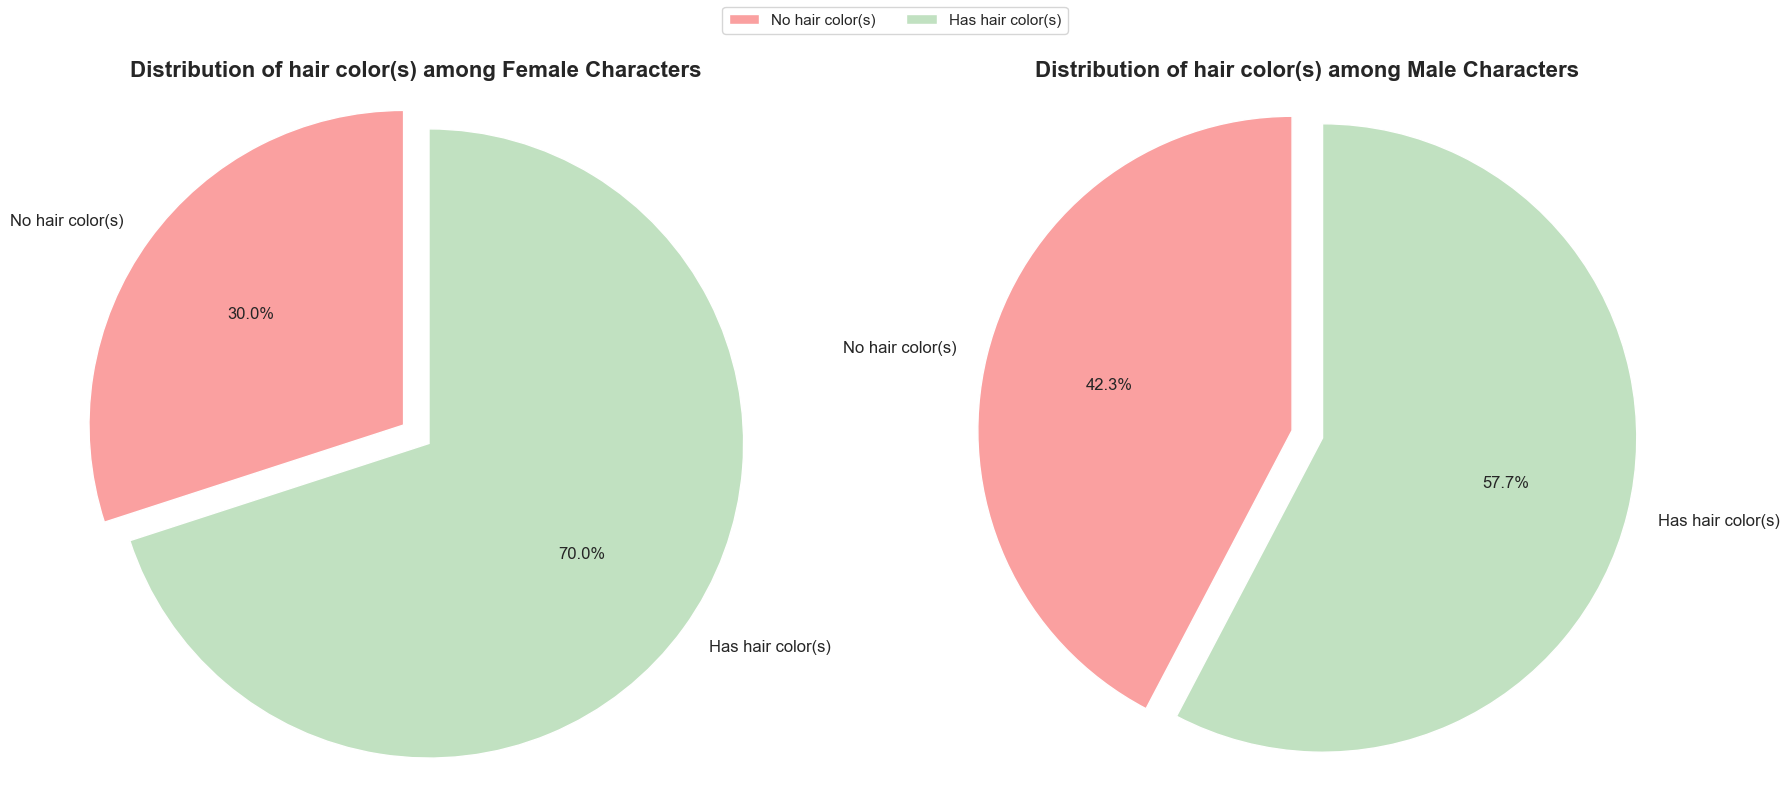

In [510]:
# For analyzing hair colors
plot_attribute_distribution_by_gender(characters_df, 'hair color', 'hair color', 'hair color(s)')